# Discovering Exoplanets with XGBoost

#### Loading Libraries

In [179]:
# Numerical Computing
import numpy as np
# Data Manipulation
import pandas as pd
# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# DateTime Library
import datetime as dt

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets

# Model Metrics
from sklearn.metrics import mean_squared_error as MSE, accuracy_score, confusion_matrix, classification_report, recall_score


#Extreme Gradient Boosting
from xgboost import XGBRegressor
from xgboost import XGBClassifier

# Warnings
import warnings

# Timing
import time

In [180]:
warnings.filterwarnings('ignore')

#### Loading Data

In [181]:
df = pd.read_csv('exoplanets.csv', nrows=400)

In [182]:
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [183]:
df['LABEL'].value_counts()

LABEL
1    363
2     37
Name: count, dtype: int64

#### Graphing The Data

In [184]:
# Retrieving seaborn attributes
sns.set()

In [185]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [186]:
# Recodifying Labels [1,2 a 0,1]
y = y.map({1: 0, 2: 1})

In [187]:
# Setting "light_plot" Function:
def light_plot(index):
    y_vals = X.iloc[index]
    x_vals = np.arange(len(y_vals))
    plt.figure(figsize=(15, 8))
    plt.xlabel('Number of Observations')
    plt.ylabel('Light Flux')
    plt.title('Light Plot ' + str(index), size=15)
    plt.plot(x_vals, y_vals, color='forestgreen')
    plt.show()

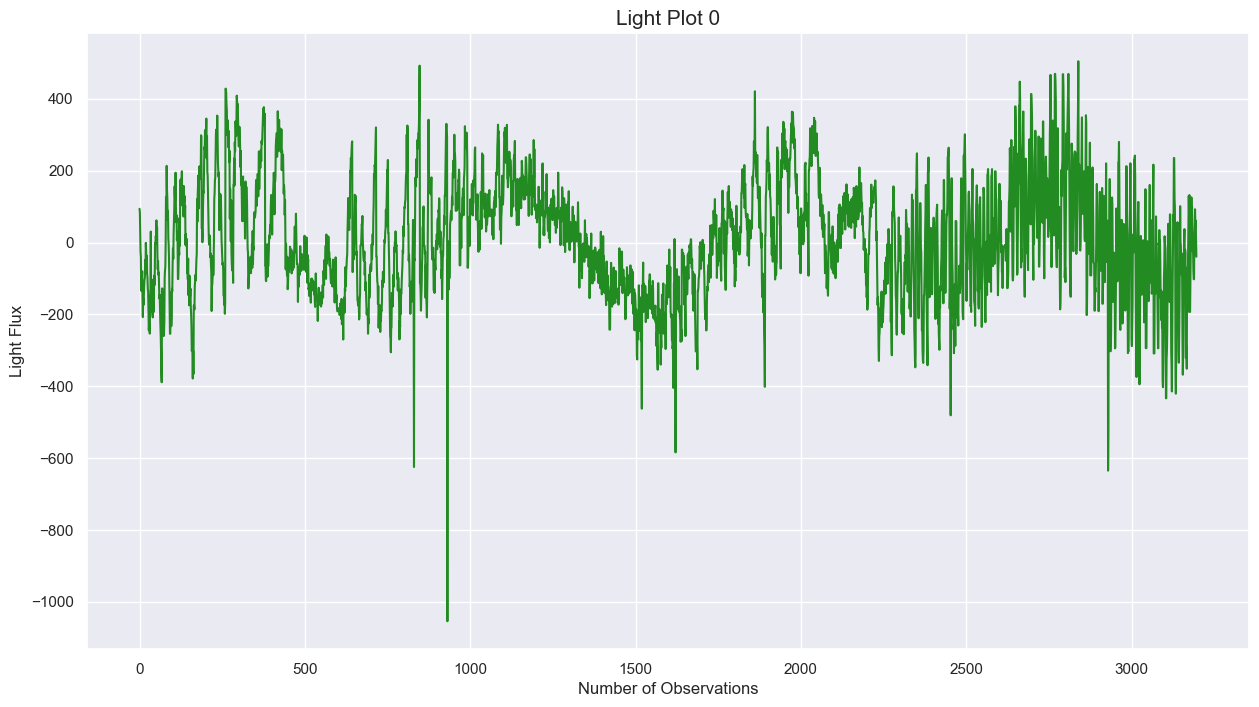

In [188]:
light_plot(0)

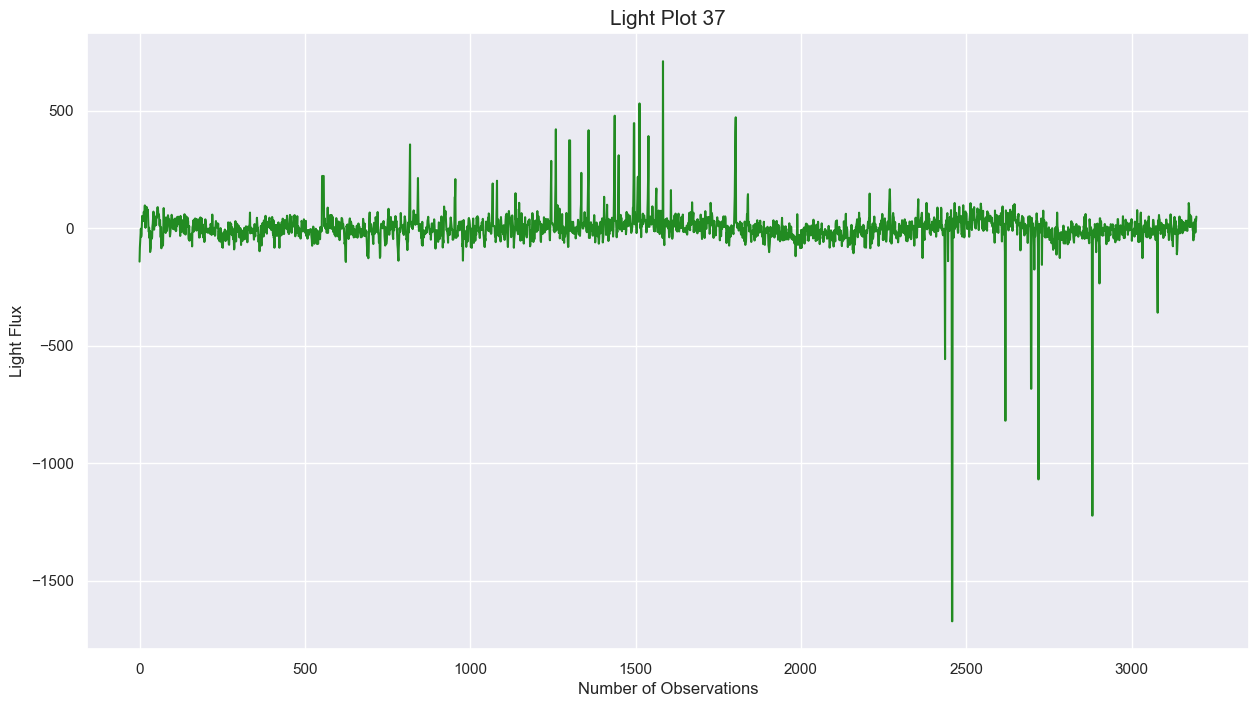

In [189]:
# Contrasting with first non-exoplanet star:
light_plot(37)

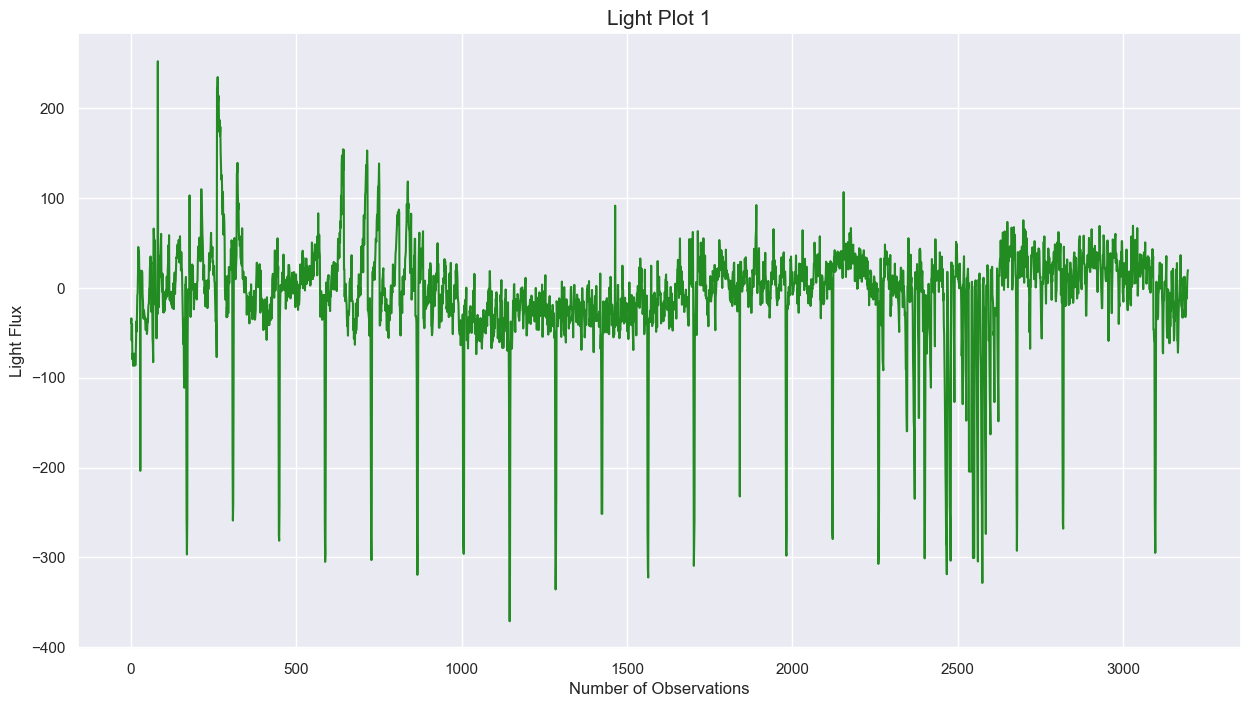

In [190]:
# Second exoplanet star light plot:
light_plot(1)

### Preparing Data

In [191]:
# General Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 9.8 MB


In [192]:
# Checking on Null-Values
df.isnull().sum().sum()

0

#### Initial XGBClassifier

In [193]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [194]:
# Model Score
model = XGBClassifier(booster='gbtree',
                      objective='binary:logistic',
                      random_state=2)

In [195]:
# Fitting Model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [196]:
# Checking prediction
y_pred = model.predict(X_test)

In [197]:
score = accuracy_score(y_pred, y_test)
print('Score: ' +str(score))

Score: 0.89


#### Confusion Matrix Analysis

In [198]:
confusion_matrix(y_test, y_pred)

array([[86,  2],
       [ 9,  3]])

#### classification Report

In [199]:
# Retrieving info from Classification Report:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        88
           1       0.60      0.25      0.35        12

    accuracy                           0.89       100
   macro avg       0.75      0.61      0.65       100
weighted avg       0.87      0.89      0.87       100



### Alternative Scoring Methods

#### recall_score

In [200]:
recall_score(y_test, y_pred, pos_label=1)

0.25

### Resampling Imbalance Data

#### The Scoring Function

In [201]:
def xgb_clf(model, nrows):
    # Reading Data
    df = pd.read_csv('exoplanets.csv', nrows=nrows)
    # Setting Data
    X = df.iloc[:, 1:]
    y = df.iloc[:, 0]
    # Mapping 'y'
    y = y.map({1: 0, 2: 1})
    # Splitting Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
    # Fitting Model
    model.fit(X_train, y_train)
    # Checking prediction
    y_pred = model.predict(X_test)
    score = recall_score(y_test, y_pred, pos_label=1)
    # Outcomes
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return score

In [202]:
# Sampling on 800 rows
xgb_clf(XGBClassifier(random_state=2), nrows=800)

[[190   0]
 [  9   1]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       190
           1       1.00      0.10      0.18        10

    accuracy                           0.95       200
   macro avg       0.98      0.55      0.58       200
weighted avg       0.96      0.95      0.94       200



0.1

In [203]:
# Sampling in 200 rows
xgb_clf(XGBClassifier(random_state=2), nrows=200)

[[37  0]
 [ 9  4]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        37
           1       1.00      0.31      0.47        13

    accuracy                           0.82        50
   macro avg       0.90      0.65      0.68        50
weighted avg       0.86      0.82      0.78        50



0.3076923076923077

In [204]:
# sampling on 74 rows
xgb_clf(XGBClassifier(random_state=2), nrows=74)

[[5 3]
 [3 8]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.73      0.73      0.73        11

    accuracy                           0.68        19
   macro avg       0.68      0.68      0.68        19
weighted avg       0.68      0.68      0.68        19



0.7272727272727273

#### Oversampling Strategy

In [205]:
# Merging before resamplig:
df_train = pd.merge(y_train, X_train, left_index=True, right_index=True)

In [206]:
# New DF with numpy repeat:
new_df = pd.DataFrame(np.repeat(df_train[df_train['LABEL']==2].values, 9, axis=0))

In [207]:
# Copying column names:
new_df.columns = df_train.columns

In [208]:
# Concatenating Process:
df_train_resample = pd.concat([df_train, new_df])

In [209]:
# Verifying value counts:
df_train_resample['LABEL'].value_counts()

LABEL
0.0    275
1.0     25
Name: count, dtype: int64

In [210]:
# Splitting resample
X_train_resample = df_train_resample.iloc[:, 1:]
y_train_resample = df_train_resample.iloc[:, 0]
# Recodifying Labels on y_train_resample of 1,2 a 0,1

In [211]:
# Verificar si hay NaN después de recodificar
print(y_train_resample.isnull().sum())

0


In [212]:
# Fitting Model:
model = XGBClassifier(random_state=2)
model.fit(X_train_resample, y_train_resample)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [213]:
# Retrieiving score:
y_pred = model.predict(X_test)

In [214]:
score = recall_score(y_test, y_pred, pos_label=1)

In [215]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(score)

[[86  2]
 [ 9  3]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        88
           1       0.60      0.25      0.35        12

    accuracy                           0.89       100
   macro avg       0.75      0.61      0.65       100
weighted avg       0.87      0.89      0.87       100

0.25


## Tuning & Scaling XGBClassifier

### Adjusting Weights
#### replace

In [216]:
df['LABEL'] = df['LABEL'].replace(1, 0)
df['LABEL'] = df['LABEL'].replace(2, 1)

In [217]:
df['LABEL'].value_counts()

LABEL
0    363
1     37
Name: count, dtype: int64

#### scale_pos_weight

In [218]:
# Setting Predictors & Target
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [219]:
# Splitting Procedure
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [220]:
# Initializing Model
model = XGBClassifier(scale_pos_weight=10, random_state=2)

In [221]:
#Fitting Model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [222]:
y_pred = model.predict(X_test)

In [223]:
# Scoring outcomes:
score = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(score)

[[85  3]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        88
           1       0.57      0.33      0.42        12

    accuracy                           0.89       100
   macro avg       0.74      0.65      0.68       100
weighted avg       0.87      0.89      0.88       100

0.3333333333333333


### Tuning XGBClassifier

#### The baseline model

In [224]:
# KFold Initialization
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=2)

In [225]:
# Model Initialization
model = XGBClassifier(scale_pos_weight=10, random_state=2)

In [226]:
# Scores by Cross-Validation
scores = cross_val_score(model, X, y, cv=kfold, scoring='recall')

In [227]:
print('Recall: ', scores)
print('Recall mean: ', scores.mean())

Recall:  [0.21052632 0.22222222]
Recall mean:  0.21637426900584794


#### grid_search

In [228]:
# Setting a Grid-Search function:
def grid_search(params, random=False, X=X, y=y, model=XGBClassifier(random_state=2)):
    xgb = model
    if random:
        grid = RandomizedSearchCV(xgb, params, cv=kfold, n_jobs=-1, scoring='recall')
    else:
        grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1, scoring='recall')
    grid.fit(X, y)
    # Best Parameters
    best_params = grid.best_params_
    print("Best params: ", best_params)
    # Best Scores
    best_score = grid.best_score_
    print("Best score: {:.5f}".format(best_score))

##### Working on hyperparams detection:

In [231]:
# Based on Number of Estimators:
grid_search(params={'n_estimators': [50, 200, 400, 800]})

Best params:  {'n_estimators': 50}
Best score: 0.13596


In [232]:
# Based on Learning Rate:
grid_search(params={'learning_rate': [0.01, 0.05, 0.2, 0.3]})

Best params:  {'learning_rate': 0.3}
Best score: 0.13596


In [233]:
# Based on max depth:
grid_search(params={'max_depth': [1, 2, 4, 8]})

Best params:  {'max_depth': 1}
Best score: 0.16082


In [234]:
# Based on subsample:
grid_search(params={'subsample': [0.3, 0.5, 0.7, 0.9]})

Best params:  {'subsample': 0.3}
Best score: 0.24415


In [235]:
# Based on gamma:
grid_search(params={'gamma': [0.05, 0.1, 0.5, 1]})

Best params:  {'gamma': 0.05}
Best score: 0.13596


In [236]:
# Based on resetting hyper-params:
grid_search(params={'learning_rate': [0.001, 0.01, 0.03], 'gamma': [0.025, 0.05, 0.5], 'max_depth': [1, 2]})

Best params:  {'gamma': 0.025, 'learning_rate': 0.03, 'max_depth': 2}
Best score: 0.10965


In [237]:
# Based on Max Delta Step:
grid_search(params={'max_delta_step': [1, 3, 5, 7]})

Best params:  {'max_delta_step': 1}
Best score: 0.13596


In [238]:
# Based on sub & colsamples: 
grid_search(params={'subsample': [0.3, 0.5, 0.7, 0.9, 1],
                    'colsample_bylevel': [0.3, 0.5, 0.9, 1],
                    'colsample_bynode': [0.3, 0.5, 0.9, 1],
                    'colsample_bytree': [0.3, 0.5, 0.9, 1]
                   }, random=True)

Best params:  {'subsample': 0.7, 'colsample_bytree': 0.9, 'colsample_bynode': 0.3, 'colsample_bylevel': 0.5}
Best score: 0.13743


#### The Balance Subset

In [239]:
X_short = X.iloc[:74, :]
y_short = y.iloc[:74]

In [240]:
# Based on Balance subset:
grid_search(params={'max_depth': [1, 2, 3],
                    'colsample_bynode': [0.5, 0.75, 1]}, X=X, y=y, model = XGBClassifier(random_state=2))

Best params:  {'colsample_bynode': 1, 'max_depth': 1}
Best score: 0.16082


#### Fine-Tuning all the data

In [242]:
# Storaging 
df_all = pd.read_csv('exoplanets.csv')

# Label Management
df_all['LABEL'] = df_all['LABEL'].replace(1, 0)
df_all['LABEL'] = df_all['LABEL'].replace(2, 1)

# Setting Predictors & Target
X_all = df_all.iloc[:, 1:]
y_all = df_all.iloc[:, 0]

In [243]:
df_all['LABEL'].value_counts()

LABEL
0    5050
1      37
Name: count, dtype: int64

In [244]:
# Weight Scaling
weight = int(5050/37)

In [246]:
# Scoring baseline model
model = XGBClassifier(scale_pos_weight=weight, random_state=2)

In [247]:
# Getting Score
scores = cross_val_score(model,
                         X_all,
                         y_all,
                         cv=kfold, scoring='recall')

print('Recall: ', scores)
print('Recall mean: ', scores.mean())

Recall:  [0.10526316 0.        ]
Recall mean:  0.05263157894736842


In [ ]:
# # Based on :
grid_search(params={'': []})

In [249]:
# Optimizing Hyperparams on learning rate:
grid_search(params={'learning_rate': [0.001, 0.01]},
                    X=X_all, y=y_all, model=XGBClassifier(scale_pos_weight=weight, random_state=2))

Best params:  {'learning_rate': 0.001}
Best score: 0.21053


In [250]:
# Optimizing Hyperparams adding max_depth:
grid_search(params={'max_depth': [1, 2], 'learning_rate': [0.001]},
                    X=X_all, y=y_all, model=XGBClassifier(scale_pos_weight=weight, random_state=2))

Best params:  {'learning_rate': 0.001, 'max_depth': 2}
Best score: 0.42982


### Consolidating Results

In [251]:
def final_model(X, y, model):
    model.fit(X, y)
    y_pred = model.predict(X_all)
    score = recall_score(y_all, y_pred)
    print(score)
    print(confusion_matrix(y_all, y_pred))
    print(classification_report(y_all, y_pred))

##### On 74 rows

In [253]:

final_model(X_short,
            y_short,
            XGBClassifier(max_depth=2, colsample_bynode=0.5, random_state=2))

1.0
[[3573 1477]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      5050
           1       0.02      1.00      0.05        37

    accuracy                           0.71      5087
   macro avg       0.51      0.85      0.44      5087
weighted avg       0.99      0.71      0.82      5087



##### On 400 rows

In [254]:
final_model(X,
            y,
            XGBClassifier(max_depth=2, colsample_bynode=0.5, scale_pos_weight=10,random_state=2))

1.0
[[4895  155]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      5050
           1       0.19      1.00      0.32        37

    accuracy                           0.97      5087
   macro avg       0.60      0.98      0.65      5087
weighted avg       0.99      0.97      0.98      5087



##### On 5050 rows

In [255]:
final_model(X_all,
            y_all,
            XGBClassifier(max_depth=2, colsample_bynode=0.5, scale_pos_weight=10,random_state=2))

1.0
[[5050    0]
 [   0   37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5050
           1       1.00      1.00      1.00        37

    accuracy                           1.00      5087
   macro avg       1.00      1.00      1.00      5087
weighted avg       1.00      1.00      1.00      5087

